### Задание 1.

Дана таблица значений некоторой функциональной зависимости, полученной из n = 11 испытаний. Значение переменной x одинаково для всех вариантов, значение переменной y выбирается согласно варианту. Методом наименьших квадратов по данной табличной зависимости построить модели в вид:
1. Линейной функции
2. Степенной функции
3. Показательной функции
4. Квадратичной функции

Промежуточные вычисления вести с точностью до 0.0001. Значения параметров a, b и c окрулить до 0.01.
Построить в плоскости xOy графики полученных функций и экспериментальные точки. Проверить модели на адекватность.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd

sp.init_printing(use_unicode=True)
data = np.array([
    [0.01, 1],
    [0.1,  1.15],
    [0.2,  1.4],
    [0.3,  1.75],
    [0.4,  2.2],
    [0.5,  2.75],
    [0.6,  3.4],
    [0.7,  4.15],
    [0.8,  5],
    [0.9,  5.95],
    [1,  7],
])

# Отделяем x и y
x = data[:, 0]
y = data[:, 1]
n = len(x)

df = pd.DataFrame({'X': x, 'Y': y})
df

,X,Y
0,0.01,1.00
1,0.10,1.22
2,0.20,1.48
3,0.30,1.78
4,0.40,2.12
5,0.50,2.50
6,0.60,2.92
7,0.70,3.38
8,0.80,3.88
9,0.90,4.42


In [3]:
############################
# 1. Линейная регрессия: y = a*x + b
############################
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x * y)

a_lin = (n * Sxy - Sx * Sy) / (n * Sxx - Sx**2)
b_lin = (Sy - a_lin * Sx) / n

#Вывод результатов с подробностями:
print("Линейная регрессия:")
print("Дано:")
print("n =", n)
print("Sx = {:.4f}".format(Sx))
print("Sy = {:.4f}".format(Sy))
print("Sxx = {:.4f}".format(Sxx))
print("Sxy = {:.4f}".format(Sxy))
print()

# Определим символьные переменные
a, b, N, S_x, S_y, S_xx, S_xy = sp.symbols('a b N S_x S_y S_xx S_xy')
# Формула для a:
formula_a = sp.Eq(a, (N * S_xy - S_x * S_y) / (N * S_xx - S_x**2))
# Подставляем числовые значения:
subs_dict = {N: n, S_x: Sx, S_y: Sy, S_xx: Sxx, S_xy: Sxy}
formula_a_num = formula_a.subs(subs_dict)

print("Вычисление коэффициента a:")
sp.pretty_print(formula_a)        # Вывод общей формулы
print("Подставляем значения:")
sp.pretty_print(formula_a_num)      # Вывод с подставленными значениями
print("→ a = {:.2f}".format(a_lin))
print()

# Формула для b:
formula_b = sp.Eq(b, (S_y - a * S_x) / N)
formula_b_num = formula_b.subs({a: a_lin, N: n, S_x: Sx, S_y: Sy})

print("Вычисление коэффициента b:")
sp.pretty_print(formula_b)
print("Подставляем значения (с a = {:.2f}):".format(a_lin))
sp.pretty_print(formula_b_num)
print("→ b = {:.2f}".format(b_lin))
print()

print("Итоговая формула:")
eq_line = sp.Eq(sp.symbols('y'), a_lin*sp.symbols('x') + b_lin)
sp.pretty_print(eq_line)
print()


Линейная регрессия:
Дано:
n = 11
Sx = 5.5100
Sy = 29.7000
Sxx = 3.8501
Sxy = 19.2600

Вычисление коэффициента a:
    N⋅S_xy - Sₓ⋅S_y
a = ───────────────
                2  
      N⋅Sₓₓ - Sₓ   
Подставляем значения:
a = 4.02076557418064
→ a = 4.02

Вычисление коэффициента b:
    -Sₓ⋅a + S_y
b = ───────────
         N     
Подставляем значения (с a = 4.02):
b = 0.685961971478607
→ b = 0.69

Итоговая формула:
y = 4.02076557418064⋅x + 0.685961971478607



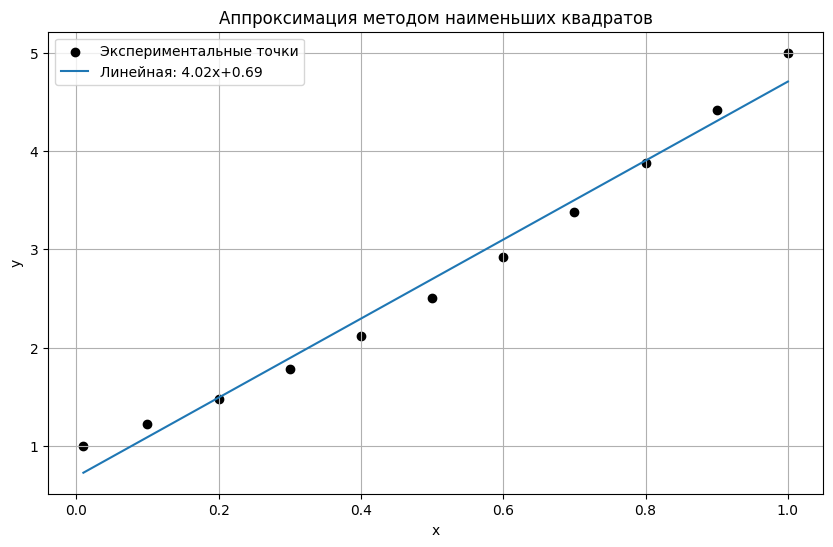

In [4]:
x_plot = np.linspace(np.min(x), np.max(x), 100)
y_lin = a_lin * x_plot + b_lin
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Экспериментальные точки')
plt.plot(x_plot, y_lin, label='Линейная: {:.2f}x+{:.2f}'.format(a_lin, b_lin))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()


Исходные суммы (логарифмов):
Σln(x) = -12.5266
Σln(y) = 9.5761
Σ[ln(x)]^2 = 32.3184
Σ[ln(x)*ln(y)] = -4.5476

Вычисление A = ln(a):
Общая формула для A:
    N⋅S_XY - S_X⋅S_Y
A = ────────────────
                 2  
     N⋅S_XX - S_X   
После подстановки:
A = 0.352149157709456
→ ln(a) = 1.2716  ⇒  a = 3.57

Вычисление коэффициента b (здесь B = b):
Общая формула для B:
    -A⋅S_X + 9.57608521931727
B = ─────────────────────────
                N            
После подстановки (с ln(a) = 1.2716):
B = 2.31860014831032
→ b = 0.35

Итоговая формула степенной аппроксимации:
                      0.352149157709456
y = 3.56646365967173⋅x                 




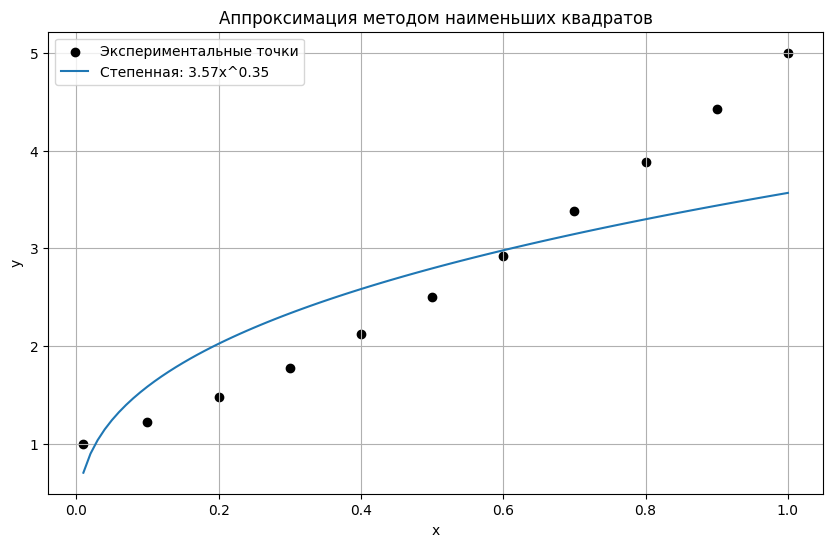

In [5]:
############################
# 2. Степенная функция: y = a*x^b
# Приводим к виду ln(y) = ln(a) + b*ln(x)
############################
# Для x <= 0 логарифм не определён, поэтому предполагаем все x > 0.
X_log = np.log(x)
Y_log = np.log(y)

S_X = np.sum(X_log)
S_Y = np.sum(Y_log)
S_XX = np.sum(X_log**2)
S_XY = np.sum(X_log * Y_log)

B_stp = (n * S_XY - S_X * S_Y) / (n * S_XX - S_X**2)
A_stp = (S_Y - B_stp * S_X) / n
a_stp = np.exp(A_stp)

# Символьные переменные
A, B, X, Y = sp.symbols('A B X Y')
formula_A = sp.Eq(A, (N * sp.symbols('S_XY') - sp.symbols('S_X') * sp.symbols('S_Y')) / (N * sp.symbols('S_XX') - sp.symbols('S_X')**2))
# Здесь зададим наши суммы как символы, затем подставим:
S_dict_stp = {N: n, sp.symbols('S_X'): S_X, sp.symbols('S_Y'): S_Y, sp.symbols('S_XX'): S_XX, sp.symbols('S_XY'): S_XY}
formula_A_num = formula_A.subs(S_dict_stp)
# Аналогично для B:
formula_B = sp.Eq(B, (S_Y - A * sp.symbols('S_X'))/N)
formula_B_num = formula_B.subs({A: A_stp, sp.symbols('S_X'): S_X, S_Y: S_Y, N: n})

print("Исходные суммы (логарифмов):")
print("Σln(x) =", "{:.4f}".format(S_X))
print("Σln(y) =", "{:.4f}".format(S_Y))
print("Σ[ln(x)]^2 =", "{:.4f}".format(S_XX))
print("Σ[ln(x)*ln(y)] =", "{:.4f}".format(S_XY))
print()

print("Вычисление A = ln(a):")
print("Общая формула для A:")
sp.pretty_print(formula_A)
print("После подстановки:")
sp.pretty_print(formula_A_num)
print("→ ln(a) = {:.4f}  ⇒  a = {:.2f}".format(A_stp, a_stp))
print()

print("Вычисление коэффициента b (здесь B = b):")
print("Общая формула для B:")
sp.pretty_print(formula_B)
print("После подстановки (с ln(a) = {:.4f}):".format(A_stp))
sp.pretty_print(formula_B_num)
print("→ b = {:.2f}".format(B_stp))
print()

eq_stp = sp.Eq(sp.symbols('y'), a_stp*sp.symbols('x')**B_stp)
print("Итоговая формула степенной аппроксимации:")
sp.pretty_print(eq_stp)
print("\n" + "="*40 + "\n")

x_plot = np.linspace(np.min(x), np.max(x), 100)

# Вычисляем значения для каждой аппроксимации:
y_lin = a_lin * x_plot + b_lin
y_stp = a_stp * x_plot**B_stp

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Экспериментальные точки')
plt.plot(x_plot, y_stp, label='Степенная: {:.2f}x^{:.2f}'.format(a_stp, B_stp))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()


Исходные суммы для экспоненциальной аппроксимации:
Σx = 5.5100
Σln(y) = 9.5761
Σx^2 = 3.8501
Σ[x*ln(y)] = 6.5571

Вычисление A = ln(a):
Общая формула:
    -Sₓ⋅b + S_y
A = ───────────
         N     
После подстановки:
A = 0.0616588714402545
→ ln(a) = 0.0617  ⇒  a = 1.06

Вычисление коэффициента b:
Общая формула для b:
    N⋅S_xy - Sₓ⋅S_y
b = ───────────────
                2  
      N⋅Sₓₓ - Sₓ   
После подстановки:
b = 1.61485256505889
→ b = 1.61

Итоговая формула показательной аппроксимации:
                      1.61485256505889⋅x
y = 1.06359945868467⋅ℯ                  




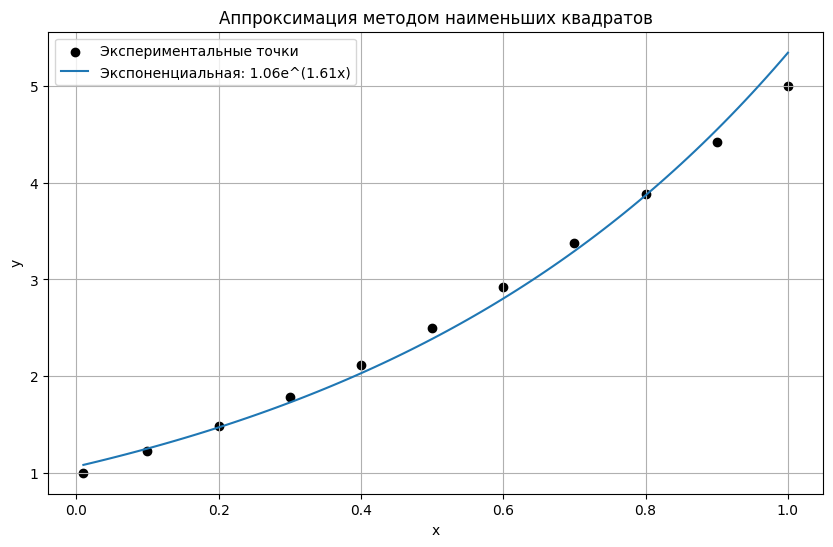

In [6]:
############################
# 3. Показательная функция: y = a * exp(b*x)
# Приводим к виду ln(y) = ln(a) + b*x
############################
Y_log_exp = np.log(y)
Sx_exp = np.sum(x)  # x те же, что и ранее
Sy_exp = np.sum(Y_log_exp)
Sxx_exp = np.sum(x**2)
Sxy_exp = np.sum(x * Y_log_exp)

b_exp = (n * Sxy_exp - Sx * Sy_exp) / (n * Sxx_exp - Sx**2)
A_exp = (Sy_exp - b_exp * Sx) / n
a_exp = np.exp(A_exp)

# Символьное представление
formula_Aexp = sp.Eq(A, (S_y - b*sp.symbols('S_x'))/N)
formula_Aexp_num = formula_Aexp.subs({S_y: Sy_exp, sp.symbols('S_x'): Sx_exp, b: b_exp, N: n})
formula_bexp = sp.Eq(b, (n * S_xy - Sx_exp * S_y) / (n * S_xx - Sx_exp**2))
formula_bexp_num = formula_bexp.subs({S_xy: Sxy_exp, Sx_exp: Sx_exp, S_y: Sy_exp, S_xx: Sxx_exp, N: n})

print("Исходные суммы для экспоненциальной аппроксимации:")
print("Σx =", "{:.4f}".format(Sx_exp))
print("Σln(y) =", "{:.4f}".format(Sy_exp))
print("Σx^2 =", "{:.4f}".format(Sxx_exp))
print("Σ[x*ln(y)] =", "{:.4f}".format(Sxy_exp))
print()

print("Вычисление A = ln(a):")
print("Общая формула:")
sp.pretty_print(formula_Aexp)
print("После подстановки:")
sp.pretty_print(formula_Aexp_num)
print("→ ln(a) = {:.4f}  ⇒  a = {:.2f}".format(A_exp, a_exp))
print()

print("Вычисление коэффициента b:")
# Здесь повторяем расчёт b, аналогичный линейной регрессии (но для ln(y) и x)
print("Общая формула для b:")
b_exp_formula = sp.Eq(b, (N*sp.symbols('S_xy') - sp.symbols('S_x')*sp.symbols('S_y'))/(N*sp.symbols('S_xx') - sp.symbols('S_x')**2))
subs_dict_exp = {N: n, sp.symbols('S_x'): Sx_exp, sp.symbols('S_y'): Sy_exp, sp.symbols('S_xx'): Sxx_exp, sp.symbols('S_xy'): Sxy_exp}
b_exp_formula_num = b_exp_formula.subs(subs_dict_exp)
sp.pretty_print(b_exp_formula)
print("После подстановки:")
sp.pretty_print(b_exp_formula_num)
print("→ b = {:.2f}".format(b_exp))
print()

eq_exp = sp.Eq(sp.symbols('y'), a_exp*sp.exp(b_exp*sp.symbols('x')))
print("Итоговая формула показательной аппроксимации:")
sp.pretty_print(eq_exp)
print("\n" + "="*40 + "\n")


x_plot = np.linspace(np.min(x), np.max(x), 100)

# Вычисляем значения для каждой аппроксимации:
y_exp = a_exp * np.exp(b_exp * x_plot)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Экспериментальные точки')
plt.plot(x_plot, y_exp, label='Экспоненциальная: {:.2f}e^({:.2f}x)'.format(a_exp, b_exp))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()


Исходные суммы для квадратичной регрессии:
Sx   = 5.5100
Sy   = 29.7000
Sx^2 = 3.8501
Sx^3 = 3.0250
Sx^4 = 2.5333
Sxy  = 19.2600
Sx^2*y = 14.9667

Система уравнений:
Sₓ⋅b + Sₓₓ⋅a + c⋅n = S_y
Sₓ⋅c + Sₓₓ⋅b + Sₓₓₓ⋅a = S_xy
Sₓₓ⋅c + Sₓₓₓ⋅b + Sₓₓₓₓ⋅a = S_x2y

После подстановки числовых значений:
3.8501⋅a + 5.51⋅b + 11⋅c = 29.7
3.025001⋅a + 3.8501⋅b + 5.51⋅c = 19.26
2.53330001⋅a + 3.025001⋅b + 3.8501⋅c = 14.9667

Решенные коэффициенты:
a = 1.96, b = 2.04, c = 0.99
Итоговая формула квадратичной регрессии:
                      2                                         
y = 1.96493742882283⋅x  + 2.04436396201026⋅x + 0.988213543146608




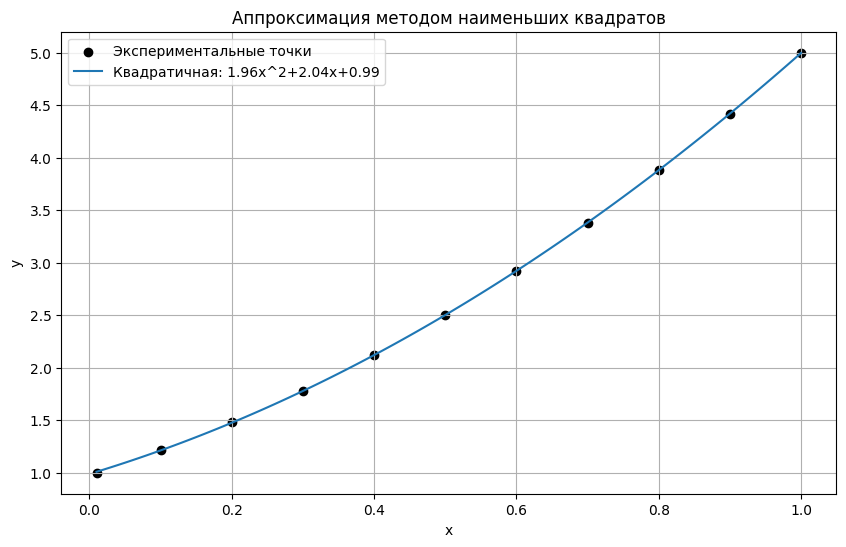

In [7]:
############################
# 4. Квадратичная регрессия: y = a*x^2 + b*x + c
############################
Sx2 = np.sum(x**2)
Sx3 = np.sum(x**3)
Sx4 = np.sum(x**4)
Sxy = np.sum(x * y)           # уже посчитано выше
Sx2y = np.sum((x**2) * y)

# Система уравнений:
# a*Sx2 + b*Sx + c*n = Sy
# a*Sx3 + b*Sx2 + c*Sx = Sxy
# a*Sx4 + b*Sx3 + c*Sx2 = Sx2y
# Составляем матрицу коэффициентов и вектор правых частей:
M = np.array([[Sxx,    Sx,  n],
              [Sx3,   Sx2, Sx],
              [Sx4,   Sx3, Sxx]])
R = np.array([Sy, Sxy, Sx2y])

# Решаем систему:
coeffs = np.linalg.solve(M, R)
a_quad, b_quad, c_quad = coeffs

print("Исходные суммы для квадратичной регрессии:")
print("Sx   =", "{:.4f}".format(Sx))
print("Sy   =", "{:.4f}".format(Sy))
print("Sx^2 =", "{:.4f}".format(Sx2))
print("Sx^3 =", "{:.4f}".format(Sx3))
print("Sx^4 =", "{:.4f}".format(Sx4))
print("Sxy  =", "{:.4f}".format(Sxy))
print("Sx^2*y =", "{:.4f}".format(Sx2y))
print()

print("Система уравнений:")
eq1 = sp.Eq(a*sp.symbols('S_xx') + b*sp.symbols('S_x') + sp.symbols('n')*sp.symbols('c'), sp.symbols('S_y'))
eq2 = sp.Eq(a*sp.symbols('S_xxx') + b*sp.symbols('S_xx') + sp.symbols('S_x')*sp.symbols('c'), sp.symbols('S_xy'))
eq3 = sp.Eq(a*sp.symbols('S_xxxx') + b*sp.symbols('S_xxx') + sp.symbols('S_xx')*sp.symbols('c'), sp.symbols('S_x2y'))
sp.pretty_print(eq1)
sp.pretty_print(eq2)
sp.pretty_print(eq3)
print()

subs_dict_quad = {
    sp.symbols('S_xx'): Sx2,
    sp.symbols('S_x'): Sx,
    sp.symbols('n'): n,
    sp.symbols('S_y'): Sy,
    sp.symbols('S_xxx'): Sx3,
    sp.symbols('S_xy'): Sxy,
    sp.symbols('S_xxxx'): Sx4,
    sp.symbols('S_x2y'): Sx2y
}
print("После подстановки числовых значений:")
sp.pretty_print(eq1.subs(subs_dict_quad))
sp.pretty_print(eq2.subs(subs_dict_quad))
sp.pretty_print(eq3.subs(subs_dict_quad))
print()

print("Решенные коэффициенты:")
print("a = {:.2f}, b = {:.2f}, c = {:.2f}".format(a_quad, b_quad, c_quad))
eq_quad = sp.Eq(sp.symbols('y'), a_quad*sp.symbols('x')**2 + b_quad*sp.symbols('x') + c_quad)
print("Итоговая формула квадратичной регрессии:")
sp.pretty_print(eq_quad)
print("\n" + "="*40 + "\n")
############################
# Построение графика
############################
# В этом примере построим график линейной функции вместе с экспериментальными точками.
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Вычисляем значения для каждой аппроксимации:
y_quad = a_quad * x_plot**2 + b_quad * x_plot + c_quad

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Экспериментальные точки')
plt.plot(x_plot, y_quad, label='Квадратичная: {:.2f}x^2+{:.2f}x+{:.2f}'.format(a_quad, b_quad, c_quad))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()
